In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

In [2]:
pip install seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
path ="creditcard.csv"
data = pd.read_csv(path)

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


### visualising the properties of data

In [ ]:
print(data.shape) 
print(data.describe()) 

(284807, 31)


### checking for missing and null values

In [6]:
data.isnull().any().sum()

0

In [10]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

ZeroDivisionError: float division by zero

### Visualising the imbalance in the output classes

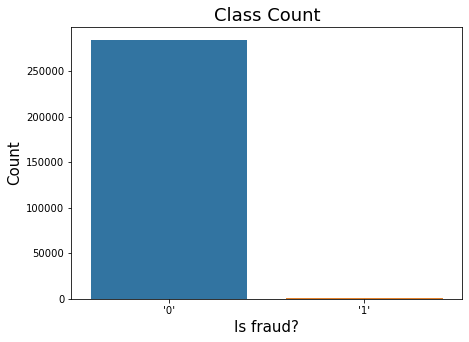

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [8]:
print('Amount details of the fraudulent transaction') 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction') 
valid.Amount.describe() 

details of valid transaction


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64

### TIme features and some feature engineering

In [10]:
timedelta = pd.to_timedelta(data['Time'], unit='s')
data['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [11]:
print(data['Time_hour'].max())

23


c:\users\shrinidhi\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


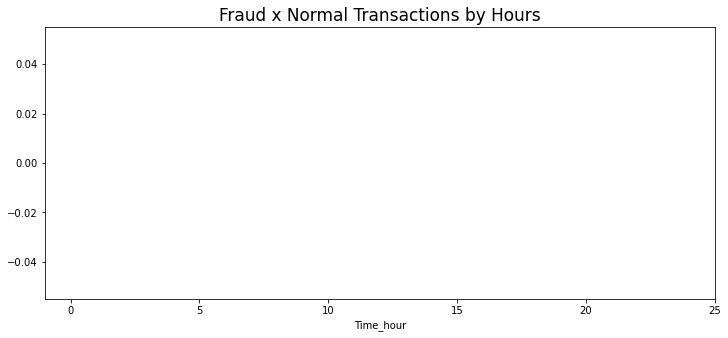

In [12]:
plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_hour"], 
           color='g')
sns.distplot(data[data['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

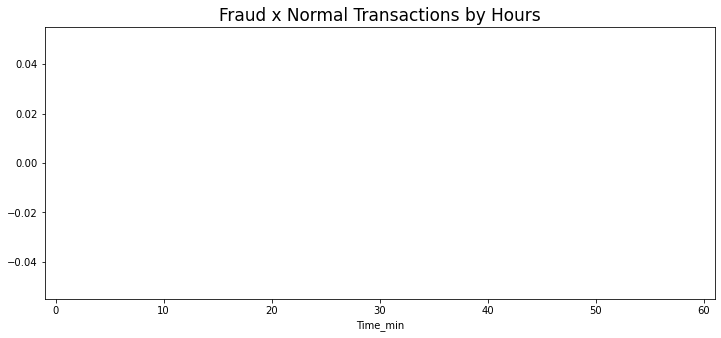

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_min"], 
           color='g')
sns.distplot(data[data['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,61])
plt.show()

### The distribution of the fraud transaction do not follow any clear pattern with regarding to the time, so we look into the amount class

In [14]:
data['Amount_log'] = np.log(data.Amount + 0.01)

### exploring the Amount by Class and seeing the distribuition of Amount transactions

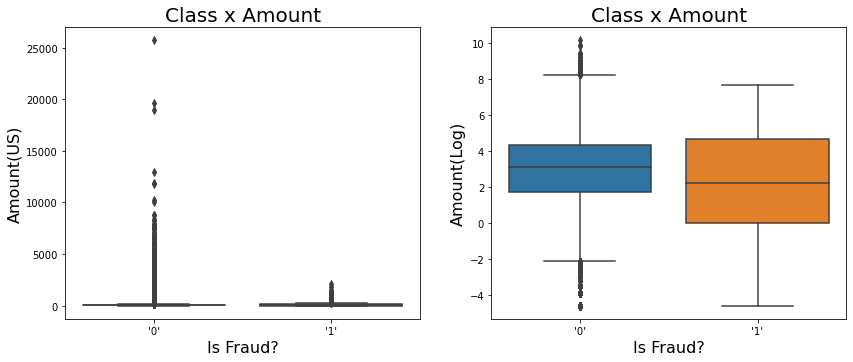

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=data)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=data)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

#### We can see a slightly difference in log amount of our two Classes.The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

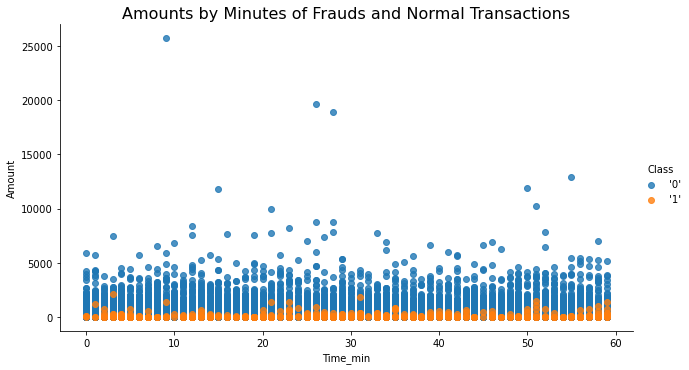

In [16]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=data, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

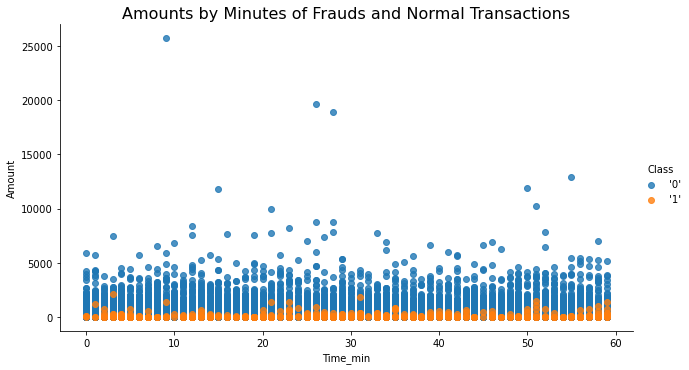

In [17]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=data, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

c:\users\shrinidhi\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


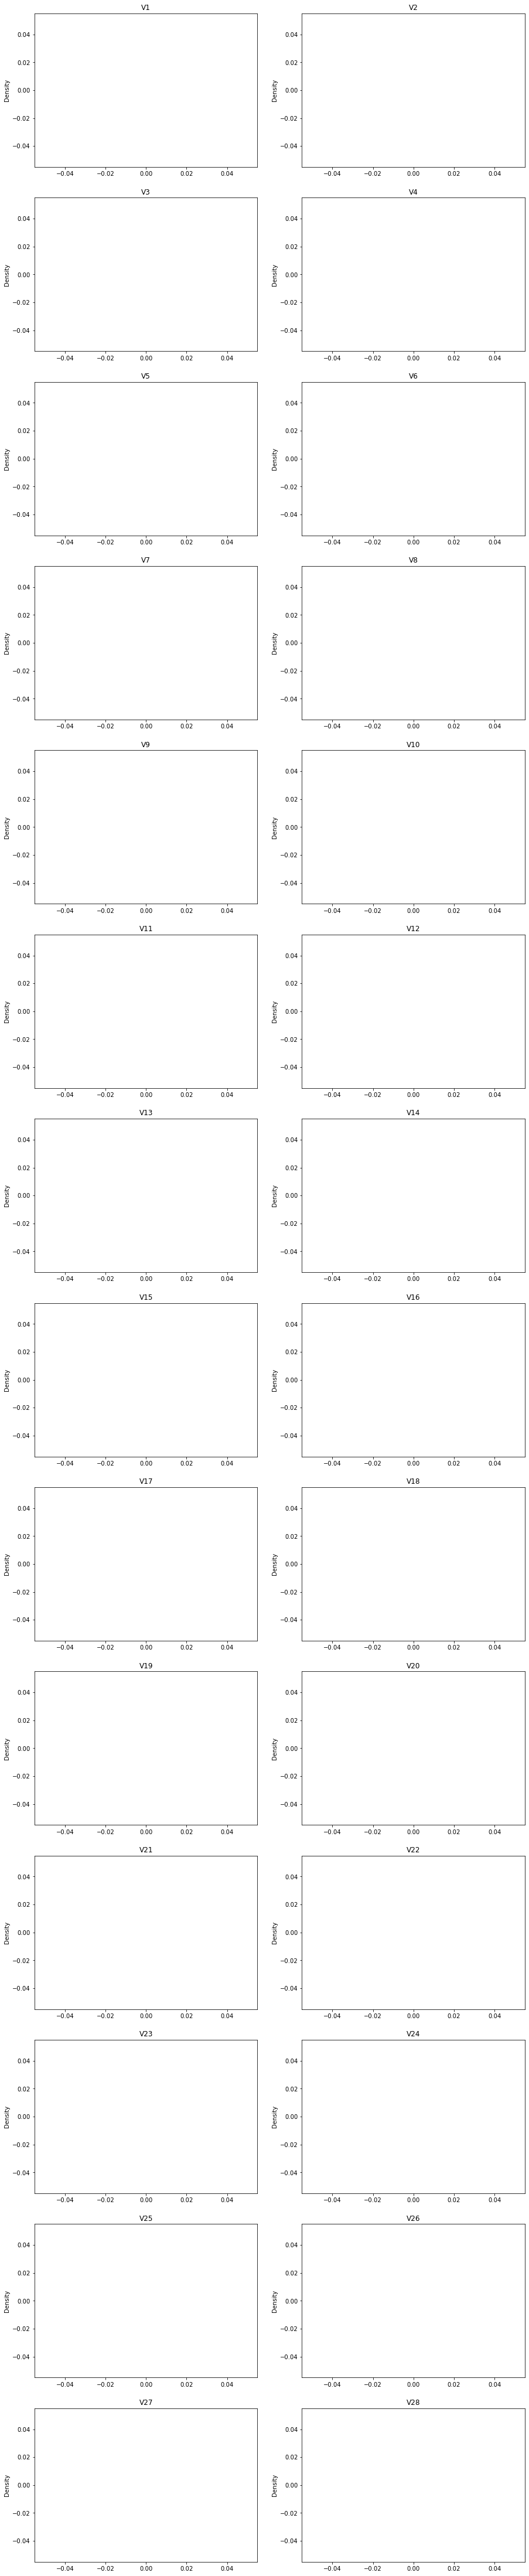

In [18]:
columns = data.iloc[:,1:29].columns

frauds = data.Class == 1
normals = data.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(data[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()


#### We can see a interesting different distribuition in some of our features like V4, V9, V16, V17 and a lot more

In [19]:
data = data[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

In [20]:
data.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,149.62,'0'
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,2.69,'0'
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,378.66,'0'
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,123.50,'0'
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,69.99,'0'


In [21]:
data.Amount = np.log(data.Amount + 0.001)

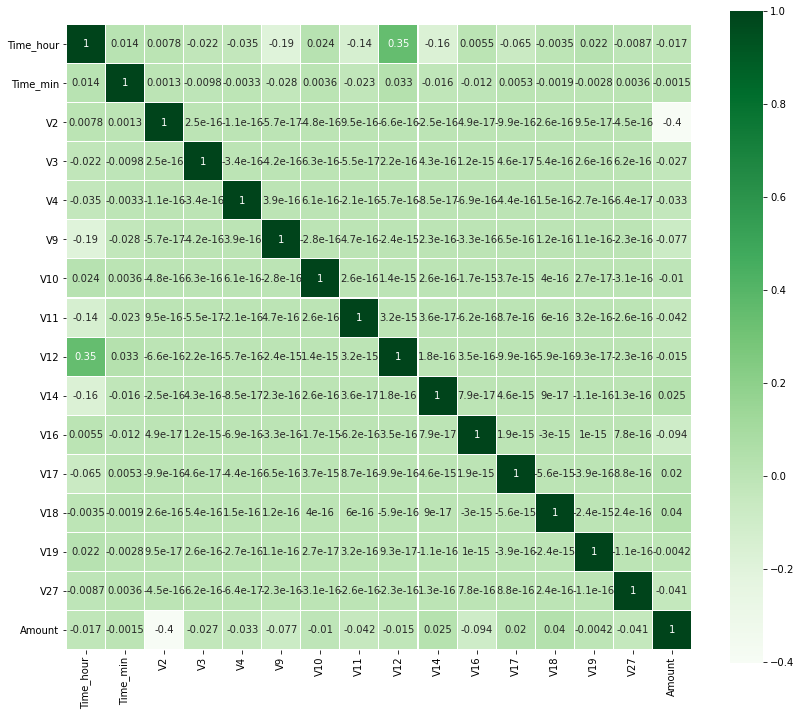

In [22]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

## Applying SMOTE

In [24]:
pip install imblearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
X = data.drop(["Class"], axis=1).values #Setting the X to do the split
y = data["Class"].values # transforming the values in array
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X,y)

## Result after applying SMOTE

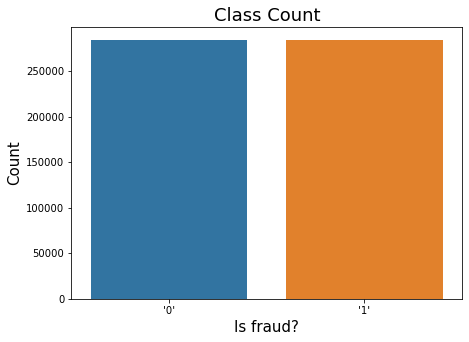

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(y_smote)
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from collections import Counter


In [28]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

### Splitting the dataset into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=2, test_size=0.20)

## Applying Random forest algorithm to the balanced dataset

In [30]:
print(y_test)

["'1'" "'0'" "'1'" ... "'0'" "'1'" "'1'"]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)



ValueError: Found input variables with inconsistent numbers of samples: [1, 284807]

In [ ]:
#classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   #classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)


In [31]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [32]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

In [33]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier(random_state=42) 
rfc.fit(X_train, y_train) 
# predictions 
yPred = rfc.predict(X_test)

In [34]:
print_results("\nSMOTE + RandomForest classification", y_test, yPred)


SMOTE + RandomForest classification
accuracy: 0.9999120693596891


c:\users\shrinidhi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(["'0'", "'1'"], dtype='<U3')

In [35]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_errors = (yPred != y_test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9999120693596891


ValueError: pos_label=1 is not a valid label: array(["'0'", "'1'"], dtype='<U3')

[[56497     9]
 [    1 57219]]


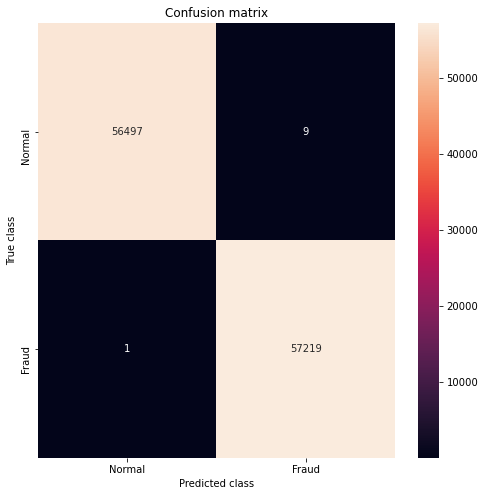

In [36]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, yPred) 
print(conf_matrix)
plt.figure(figsize =(8,8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


## Smote+ SVM algorithm

In [37]:
partialX_train=X_train[:10000,:]
partialy_train=y_train[:10000]
print(partialX_train.shape)
print(partialy_train.shape)

(10000, 16)
(10000,)


In [38]:
from sklearn import svm
clf_SVM = svm.SVC(C=1,kernel="linear")
clf_SVM.fit(partialX_train,partialy_train)

SVC(C=1, kernel='linear')

In [39]:
y_pred_svm  = clf_SVM.predict(X_test)

In [40]:
print_results("\nSMOTE + SVM classification", y_test, y_pred_svm)


SMOTE + SVM classification
accuracy: 0.9382287251815767


c:\users\shrinidhi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(["'0'", "'1'"], dtype='<U3')

### SMOTE+ K-Nearest Neighbour Algorithm

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(partialX_train, partialy_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [42]:
y_pred_WKNN = clf_WKNN.predict(X_test)
print_results("\nSMOTE + KNN classification", y_test, y_pred_WKNN)


SMOTE + KNN classification
accuracy: 0.9802419851221357


c:\users\shrinidhi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(["'0'", "'1'"], dtype='<U3')

### Comparing the accuracy of the three algorithms

In [43]:
RFacc = accuracy_score(y_test, yPred) 
SVMacc= accuracy_score(y_test,y_pred_svm)
KNNacc= accuracy_score(y_test,y_pred_WKNN)
print("RF:{},\nSVM:{} ,\nKNN: {}".format(RFacc,SVMacc,KNNacc))

RF:0.9999120693596891,
SVM:0.9382287251815767 ,
KNN: 0.9802419851221357


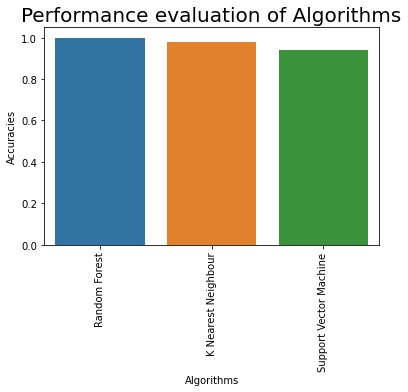

In [44]:
accuracies=[RFacc,SVMacc,KNNacc]
algorithms=["Random Forest","Support Vector Machine","K Nearest Neighbour"]
acc_data = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})
acc_data = acc_data.sort_values(by='Accuracies',ascending=False)

g = sns.barplot(x='Algorithms',y='Accuracies',data=acc_data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Performance evaluation of Algorithms',fontsize=20)
plt.show() 

In [45]:
from tkinter import *
import math
from PIL import ImageTk,Image

def predict():
    amount = Entry_3.get()
    amount=float(amount)
    time = Entry_4.get()
    time_values=time.split(":")
    time_hour=time_values[0]
    time_min=time_values[1]
    print(type(amount))

    out = clf_SVM.predict([[float(time_hour),float(time_min),float(1.9432296),float(-3.01967688),float(4.35654616),float(-1.26718624),float(-0.51253851),float(0.82463878),float(-1.14235949),float(-5.08257826),float(2.49689065),float(3.30295356),float(2.46275665),float(-2.16538195),float(0.0867521),float(math.log(amount+0.001))]])
    print(out)
    if out[0] == 1 :
        output.delete(0,END)
        output.insert(0,'Fraud')
    elif out[0] == 0: 
        output.delete(0,END)
        output.insert(0,'Not Fraud')

root=Tk()
root.title("Credit card transaction page")


canvas=Canvas(root,width=700,height=700)
image=ImageTk.PhotoImage(Image.open("trial4.gif"))

canvas.create_image(0,0,anchor=NW,image=image)
canvas.pack(expand=YES,fill= BOTH)

var = StringVar()
label = Label(canvas, textvariable = var,font=('arial',15,'bold'),bd=20,background="lightblue")
var.set('Credit Card Fraudulent Transaction detection system')
label.grid(row=0,columnspan=6)
root.geometry("600x600")

label_1 = Label(canvas, text ='Credit card number',font=("Helvetica", 16),background="lightblue")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(canvas)
Entry_1.grid(row=11,column=1)

label_2 = Label(canvas, text ='Card holder name',font=("Helvetica", 16),background="lightblue")
label_2.grid(row=12,column=0)
    
Entry_2= Entry(canvas)
Entry_2.grid(row=12,column=1)

label_3 = Label(canvas, text ='Amount',font=("Helvetica", 16),background="lightblue")
label_3.grid(row=13,column=0)
    
Entry_3= Entry(canvas)
Entry_3.grid(row=13,column=1)

label_4 = Label(canvas, text ='Time',font=("Helvetica", 16),background="lightblue")
label_4.grid(row=14,column=0)

Entry_4= Entry(canvas)
Entry_4.grid(row=14,column=1)

output = Entry(canvas, font=("Helvetica", 16),background="lightblue")
output.grid(row=35,column=1)

from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Entry_4.delete(0,END)
Entry_4.insert(0,current_time)

b1 = Button(canvas, text = 'Predict',font=("Helvetica", 16),background="salmon3",command = predict)
b1.grid(row=20,column=0)


root.mainloop()

FileNotFoundError: [Errno 2] No such file or directory: 'trial4.gif'

In [46]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [47]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
time_values=current_time.split(":")
time_hour=time_values[0]
time_min=time_values[1]



Current Time = 11:43:30
